# Credit Card Fraud Detection

## Project Overview
This project focuses on building a machine learning model to detect fraudulent transactions using the Kaggle Credit Card Fraud Detection dataset. Due to the highly imbalanced nature of the dataset, where fraudulent transactions are rare, special techniques such as SMOTE (Synthetic Minority Oversampling Technique) and threshold adjustments were used to improve the model's performance.

---

## Dataset Description
The dataset contains transactions made by European cardholders in September 2013. The dataset includes:

- **Features:** `V1` through `V28`, which are PCA-transformed numerical features, along with `Time` and `Amount`.
- **Target Variable:** `Class` (0 = Non-Fraudulent, 1 = Fraudulent).

### Summary:
- **Number of Rows:** 284,807
- **Number of Columns:** 31
- **Imbalance:** Only 492 fraudulent transactions (~0.17% of the total dataset).

---

## Key Steps
### 1. Data Exploration and Preprocessing
- **Explored Class Distribution:** Identified the severe class imbalance.
- **Normalized Features:** The `Amount` column was scaled using `StandardScaler`.
- **Handled Class Imbalance:** Applied SMOTE to oversample the minority class in the training set.

### 2. Model Development
- **Baseline Model:** Logistic Regression was used as a baseline to assess the model's ability to detect fraud.
- **Advanced Model:** XGBoost, a gradient boosting algorithm, was trained to achieve better performance.

### 3. Evaluation
- Evaluated models using metrics like **Precision**, **Recall**, **F1-Score**, and **ROC-AUC**.
- Adjusted the classification threshold to improve precision for fraud detection.

---

## Results
### Model Performance (Threshold = 0.7):
- **Class 0 (Non-Fraudulent Transactions):**
  - Precision: 1.00
  - Recall: 0.99
  - F1-Score: 1.00
- **Class 1 (Fraudulent Transactions):**
  - Precision: 0.17
  - Recall: 0.90
  - F1-Score: 0.29
- **Overall Accuracy:** 99%

### Key Visualizations:
1. **ROC Curve:** Achieved an AUC of 0.99, demonstrating excellent model performance.
2. **Precision-Recall Curve:** Showed the trade-off between precision and recall, with the threshold of 0.7 providing the best balance.

---

## Libraries Used
- **Data Manipulation:** pandas, numpy
- **Visualization:** matplotlib, seaborn
- **Machine Learning:** scikit-learn, XGBoost, imbalanced-learn

---

## How to Run the Notebook
### Prerequisites:
- Python 3.7+
- Install the required libraries:
  ```bash
  pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn
  ```

### Steps:
1. Clone the repository or download the notebook.
2. Load the dataset (`creditcard.csv`) in the specified location.
3. Run the cells in sequence to reproduce the results.

---

## Future Improvements
1. Implement other anomaly detection techniques, such as Isolation Forest or Autoencoders, for comparison.
2. Perform hyperparameter tuning for further optimization.
3. Explore real-time fraud detection deployment using FastAPI or Flask.


In [1]:
!pip install imbalanced-learn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import imblearn

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Imbalanced-learn version:", imblearn.__version__)


Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.0
Seaborn version: 0.13.2
Scikit-learn version: 1.6.0
Imbalanced-learn version: 0.12.4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

# View the first few rows
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If no missing values, you can skip imputation


Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


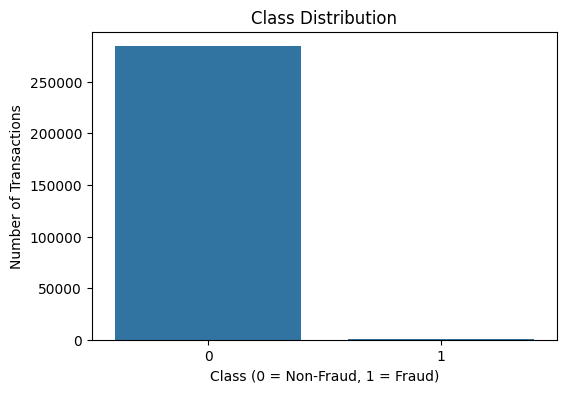

In [6]:
# Check class distribution
class_counts = df['Class'].value_counts()
print("Class Distribution:\n", class_counts)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Normalize the Amount column
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Confirm normalization
print(df['Amount'].head())


0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())


Training set class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Testing set class distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
lr = LogisticRegression(random_state=42,max_iter=1000)
lr.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56215   649]
 [    9    89]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.87      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (XGBoost):
 [[56839    25]
 [   13    85]]


In [15]:
!pip install --upgrade scikit-learn xgboost


In [16]:
from xgboost import DMatrix, cv
import xgboost as xgb

# Prepare the DMatrix for XGBoost
dtrain = DMatrix(X_train_smote, label=y_train_smote)

# Define the parameter space
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 10,
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'auc'
}

# Perform cross-validation
cv_results = cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics='auc',
    seed=42
)

# Print the best number of boosting rounds
print(cv_results)
best_num_boost_rounds = cv_results['test-auc-mean'].idxmax()
print("Best number of boosting rounds:", best_num_boost_rounds)


     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.976208       0.000395       0.976102      0.000375
1          0.985145       0.000628       0.985158      0.000380
2          0.988124       0.000056       0.988061      0.000339
3          0.990752       0.000175       0.990730      0.000229
4          0.991710       0.000629       0.991691      0.000481
..              ...            ...            ...           ...
195        0.999897       0.000010       0.999882      0.000011
196        0.999897       0.000010       0.999882      0.000011
197        0.999898       0.000009       0.999883      0.000011
198        0.999901       0.000008       0.999886      0.000014
199        0.999901       0.000008       0.999887      0.000014

[200 rows x 4 columns]
Best number of boosting rounds: 199


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56058   806]
 [   10    88]]


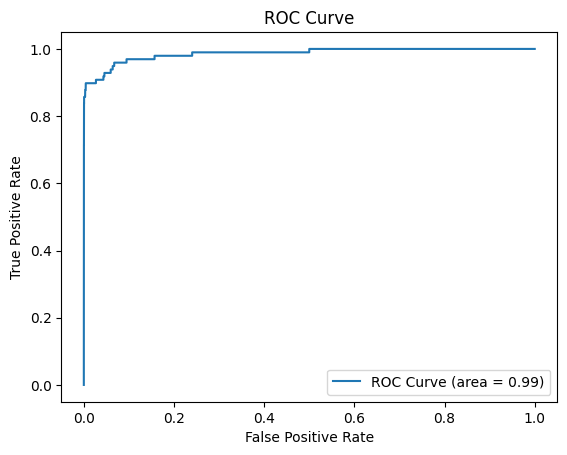

In [17]:
# Train the final XGBoost model
final_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_rounds
)

# Predict on the test set
dtest = DMatrix(X_test)
y_pred_prob = final_xgb.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate the final model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
# Adjust decision threshold
threshold = 0.6  # Example threshold
y_pred_adjusted = [1 if prob > threshold else 0 for prob in y_pred_prob]

# Evaluate with adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix with Adjusted Threshold:\n", confusion_matrix(y_test, y_pred_adjusted))


Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix with Adjusted Threshold:
 [[56265   599]
 [   10    88]]


In [19]:
thresholds = [0.5, 0.6, 0.65, 0.7]
for threshold in thresholds:
    y_pred_adjusted = [1 if prob > threshold else 0 for prob in y_pred_prob]
    print(f"\nThreshold: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))



Threshold: 0.5
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962


Threshold: 0.6
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962


Threshold: 0.65
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.90      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00  

In [20]:
# Set the final threshold
final_threshold = 0.7
y_pred_final = [1 if prob > final_threshold else 0 for prob in y_pred_prob]

# Evaluate with final threshold
from sklearn.metrics import classification_report, confusion_matrix

print("Final Classification Report (Threshold = 0.7):\n", classification_report(y_test, y_pred_final))
print("Final Confusion Matrix (Threshold = 0.7):\n", confusion_matrix(y_test, y_pred_final))


Final Classification Report (Threshold = 0.7):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.90      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.64     56962
weighted avg       1.00      0.99      0.99     56962

Final Confusion Matrix (Threshold = 0.7):
 [[56441   423]
 [   10    88]]


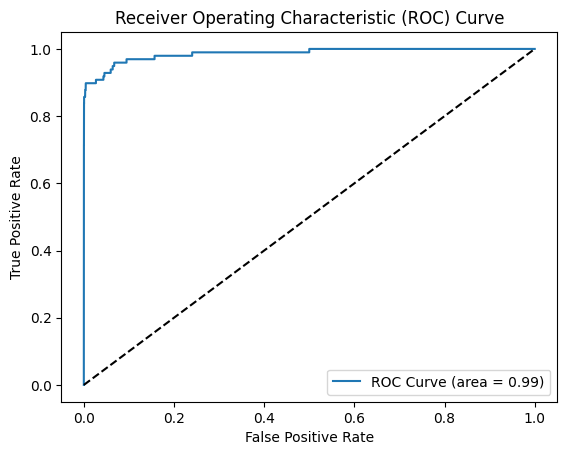

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


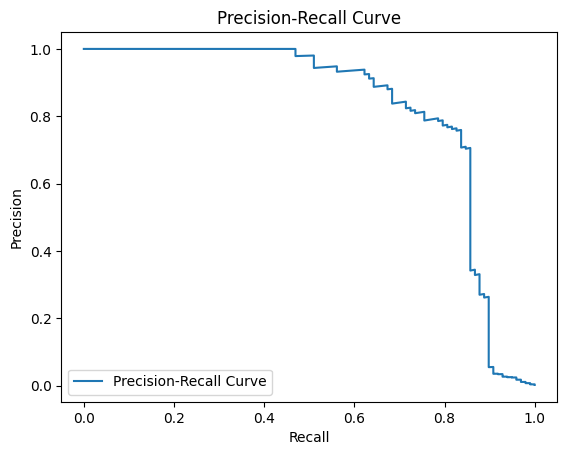

In [22]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


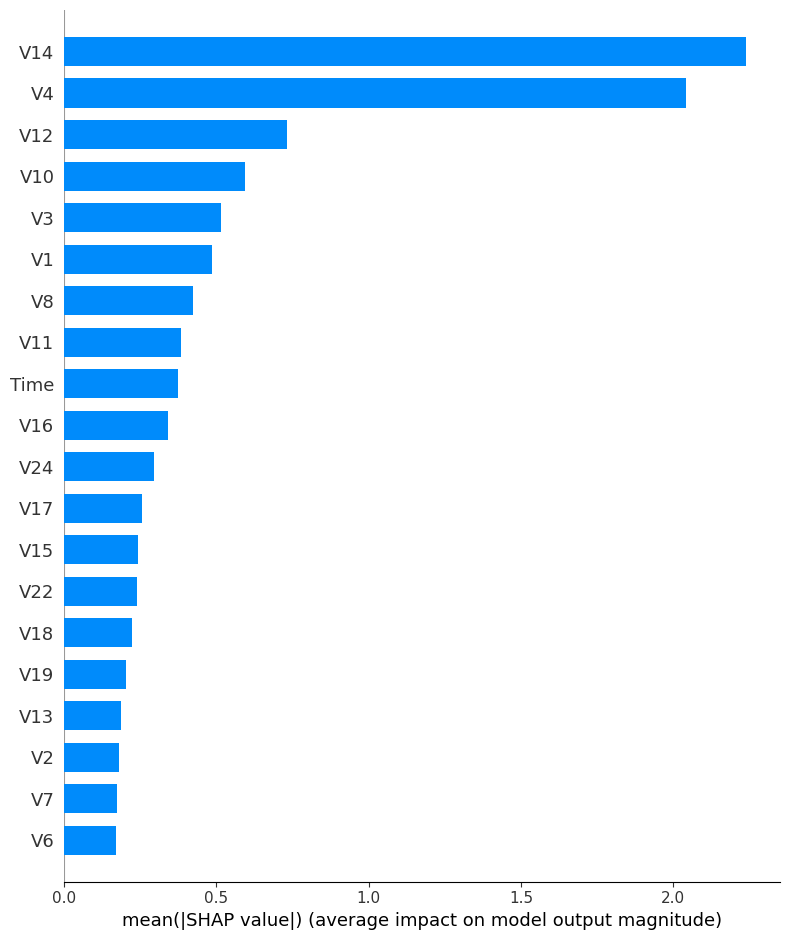

In [23]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(final_xgb)
shap_values = explainer.shap_values(DMatrix(X_test))

# Plot feature importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize SHAP values for a specific prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
